# A1: Data Curation
### Harini Ram Prasad
This section imports all the necessary libraries to access the Wikimedia API, handle data processing, json file formats and data visualization.


In [1]:
import json   # json files format library
import requests   # make Wikimedia API calls 
import numpy as np     # handle array manipulation (pretty minimally used in this notebook)
import pandas as pd      # handle dataframe manipulation, data cleaning, joining
from matplotlib import pyplot as plt  # library to visualize data as a time series
# present visuals in-line instead of as output dump
%matplotlib inline

# Step 1: Gathering the data

### Defining API endpoints

This section defines the general API endpoints without specifying the exact parameters for each endpoint. 2 API endpoints have been defined:
1. The Legacy Pagecounts API endpoint- This API provides article pagecount data relating to Wikipedia and its sister projects. The term 'pagecounts' is the legacy term for the more recently coined 'pageviews'.
More information available here: 

Endpoint:https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end
Documentation: https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts

2. The Pageviews API endpoint- This API provides article pageview data relating to Wikipedia and its sister projects. This improves upon the above Pagecounts API by providing a parameter to filter for automated views versus user views. Automated views include bots, web crawlers, etc. 
More information available here: 

Endpoint:https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end
Documentation: https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews

In [2]:
# Legacy Pagecounts API endpoint
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
# Pageviews API endpoint
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

###  Defining parameters for querying API

This section defines 5 dictionaries containing parameters to get monthly aggregated Wikipedia data from the 2 aforementioned API endpoints. The 5 dictionaries will be used to extract 5 JSON files with different types of data as mentioned below.

1. Legacy Pagecounts API: This API provides data from Wikipedia's mobile and desktop access sites.

    a. The variable 'desktop_params_legacy' will be used to access data from Wikipedia's desktop site.
    
    b. The variable 'mobile_params_legacy' will be used to access data from Wikipedia's mobile site.
   
   
2. Pageviews API: This API provides data from Wikipedia's mobile web, mobile app and desktop access sites.

    a. The variable 'desktop_params_pageviews' will be used to access data from Wikipedia's desktop site.
    
    b. The variable 'mobile_web_params_pageviews' will be used to access data from Wikipedia's mobile web site.
    
    c. The variable 'mobile_app_params_pageviews' will be used to access data from Wikipedia's mobile app.

In [3]:
# dictionary containing parameters for getting monthly aggregated legacy view data 
# see: https://wikimedia.org/api/rest_v1/#!/Legacy_data/get_metrics_legacy_pagecounts_aggregate_project_access_site_granularity_start_end

# Legacy view parameters for desktop access site
desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                # for start use 1st day of month before first month of data
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }
# Legacy view parameters for mobile access site
mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                # for start use 1st day of month before first month of data
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

# dictionary containing parameters for getting monthly aggregated current standard pageview data
# see: https://wikimedia.org/api/rest_v1/#!/Pageviews_data/get_metrics_pageviews_aggregate_project_access_agent_granularity_start_end

# Pageview parameters for desktop access site
desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    # for start use 1st day of month before first month of data
                     "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                     "end" : "2020090100"
                        }

# Pageview parameters for mobile web access site
mobile_web_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    # for start use 1st day of month before first month of data
                     "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                     "end" : "2020090100"
                        }

# Pageview parameters for mobile app access site
mobile_app_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    # for start use 1st day of month before first month of data
                     "start" : "2007120100",
                    # for end use 1st day of month following final month of data
                     "end" : "2020090100"
                        }

# Customize headers with your own information
headers = {
    'User-Agent': 'https://github.com/hariniramp', # personal GitHub
    'From': 'hrp98@uw.edu'   # personal UW email
}

This function calls the API with the respective endpoint and parameters and returns the data in a dictionary format.

Input: Endpoint URL (string), Parameters(dictionary)

Output: Data (dictionary)

In [4]:
def api_call(endpoint,parameters):
    # Uses requests library to get data from endpoint and substituting parameters
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()    
    return response

This section calls the 2 endpoints (Legacy Pagecounts and Pageviews) in Part II Section 1 with the different parameters specified in Part II Section 2. The 5 variables contain data about the 5 query types in dictionary formats.

1. Pagecounts Legacy API (Desktop): variable name is 'desktop_monthly_pagecounts'

2. Pagecounts Legacy API (Mobile): variable name is 'mobile_monthly_pagecounts'


3. Pageviews API (Desktop): variable name is 'desktop_monthly_pageviews'

4. Pageviews API (Mobile Web): variable name is 'mobile_web_monthly_pageviews'

5. Pageviews API (Mobile App): variable name is 'mobile_app_monthly_pageviews'

In [5]:
# Pagecounts
desktop_monthly_pagecounts = api_call(endpoint_legacy, desktop_params_legacy)
mobile_monthly_pagecounts = api_call(endpoint_legacy, mobile_params_legacy)

# Pageviews
desktop_monthly_pageviews = api_call(endpoint_pageviews, desktop_params_pageviews)
mobile_app_monthly_pageviews = api_call(endpoint_pageviews, mobile_app_params_pageviews)
mobile_web_monthly_pageviews = api_call(endpoint_pageviews, mobile_web_params_pageviews)

Uncomment the print statements to view any of the dictionary objects

In [6]:
#print(mobile_monthly_pagecounts)
#print(desktop_monthly_pagecounts)
#print(desktop_monthly_pageviews)
#print(mobile_app_monthly_pageviews)
#print(mobile_web_monthly_pageviews)

This section will save each of the 5 dictionary variables outlined above as JSON files.

In [7]:
with open("pagecounts_desktop-site_200801-202008.json", "w") as outfile:  
    json.dump(desktop_monthly_pagecounts, outfile) 
    
with open("pagecounts_mobile-site_200801-202008.json", "w") as outfile:  
    json.dump(mobile_monthly_pagecounts, outfile) 

with open("pageviews_desktop-site_200801-202008.json", "w") as outfile:  
    json.dump(desktop_monthly_pageviews, outfile) 
    
with open("pageviews_mobile-web-site_200801-202008.json", "w") as outfile:  
    json.dump(mobile_web_monthly_pageviews, outfile) 
    
with open("pageviews_mobile-app-site_200801-202008.json", "w") as outfile:  
    json.dump(mobile_app_monthly_pageviews, outfile) 

# Step 2: Processing the data
This section will process the data as follows:

1. JSON/dictionary variables will be converted to Pandas dataframes

In [8]:
# Pagecounts data converted to dataframes
desktop_pagecounts = pd.DataFrame.from_records(desktop_monthly_pagecounts['items'])
mobile_pagecounts = pd.DataFrame.from_records(mobile_monthly_pagecounts['items'])

# Pageviews data converted to dataframes
desktop_pageviews = pd.DataFrame.from_records(desktop_monthly_pageviews['items'])
mobile_app_pageviews = pd.DataFrame.from_records(mobile_app_monthly_pageviews['items'])
mobile_web_pageviews = pd.DataFrame.from_records(mobile_web_monthly_pageviews['items'])

2. Dataframes will then drop the columns irrelevant to analysis (project, granularity, access site, agent)

In [9]:
# Pagecounts dataframes drop 'project','granularity', 'access-site' columns
desktop_pagecounts = desktop_pagecounts.drop(columns=['project','granularity', 'access-site'])
mobile_pagecounts = mobile_pagecounts.drop(columns=['project','granularity', 'access-site'])

# Pagecounts dataframes drop 'project','granularity', 'access', 'agent' columns
desktop_pageviews = desktop_pageviews.drop(columns=['project','granularity', 'agent', 'access'])
mobile_app_pageviews = mobile_app_pageviews.drop(columns=['project','granularity', 'agent', 'access'])
mobile_web_pageviews = mobile_web_pageviews.drop(columns=['project','granularity', 'agent', 'access'])

3. In pageviews dataframes, the mobile app and mobile web pageviews will be joined based on 'timestamp' data field. The views of mobile app and mobile web will be combined to result in a mobile pageviews field.

In [10]:
# Merge mobile_app_pageviews & mobile_web_pageviews
mobile_pageviews = pd.merge(mobile_app_pageviews, mobile_web_pageviews, how = 'outer', on = 'timestamp' )

# Calculate total mobile views as sum of mobile app and mobile web pageviews
mobile_pageviews['views'] = mobile_pageviews['views_x'] + mobile_pageviews['views_y']

# Drop individual mobile web and mobile app pageview count
mobile_pageviews = mobile_pageviews.drop(columns = ['views_x', 'views_y'])

4. The year and month of each view count are derived by parsing the timestamps.

In [11]:
# Mobile pageview API viewcount: Add month and year columns
mobile_pageviews['year'] = mobile_pageviews['timestamp'].apply(lambda a:a[0:4])
mobile_pageviews['month'] = mobile_pageviews['timestamp'].apply(lambda a:a[4:6])

# Desktop pageview API viewcount: Add month and year columns
desktop_pageviews['year'] = desktop_pageviews['timestamp'].apply(lambda a:a[0:4])
desktop_pageviews['month'] = desktop_pageviews['timestamp'].apply(lambda a:a[4:6])

# Mobile pagecount API viewcount: Add month and year columns
mobile_pagecounts['year'] = mobile_pagecounts['timestamp'].apply(lambda a:a[0:4])
mobile_pagecounts['month'] = mobile_pagecounts['timestamp'].apply(lambda a:a[4:6])

# Desktop pagecount API viewcount: Add month and year columns
desktop_pagecounts['year'] = desktop_pagecounts['timestamp'].apply(lambda a:a[0:4])
desktop_pagecounts['month'] = desktop_pagecounts['timestamp'].apply(lambda a:a[4:6])

5. The pageviews data is consolidated by joining pageviews through desktop access and mobile access on the 'timestamp' field. An additional field called 'pageview_all_views' is used to depict the total views using the Pageview API.

In [12]:
# In Pageview API data, rename 'views' to required format-pageview_mobile_views, pageview_desktop_views
mobile_pageviews = mobile_pageviews.rename(columns={'views':'pageview_mobile_views'})
desktop_pageviews = desktop_pageviews.rename(columns={'views':'pageview_desktop_views'})
desktop_pageviews = desktop_pageviews.drop(columns = ['year','month'])

# Merge mobile and desktop data to overall pageviews data
pageviews_data = pd.merge(mobile_pageviews, desktop_pageviews, how = 'outer', on = 'timestamp' )
pageviews_data['pageview_all_views'] = pageviews_data['pageview_mobile_views'] + pageviews_data['pageview_desktop_views']

# Display pageviews_data format (first 5 rows)
pageviews_data.head(5)

,timestamp,pageview_mobile_views,year,month,pageview_desktop_views,pageview_all_views
0,2015070100,3288755294,2015,07,4376666686,7665421980
1,2015080100,3302333038,2015,08,4332482183,7634815221
2,2015090100,3170203333,2015,09,4485491704,7655695037
3,2015100100,3268499132,2015,10,4477532755,7746031887
4,2015110100,3236601070,2015,11,4287720220,7524321290


6. The pagecounts data is consolidated by joining pagecounts through desktop access and mobile access on the 'timestamp' field. An additional field called 'pagecount_all_views' is used to depict the total views using the Legacy Pagecount API.

In [13]:
# In Pagecount API data, rename 'count' to required format-pagecount_mobile_views, pagecount_desktop_views
mobile_pagecounts = mobile_pagecounts.rename(columns={'count':'pagecount_mobile_views'})
desktop_pagecounts = desktop_pagecounts.rename(columns={'count':'pagecount_desktop_views'})
mobile_pagecounts = mobile_pagecounts.drop(columns = ['year','month'])

# Merge mobile and desktop data to overall pageviews data
pagecounts_data = desktop_pagecounts.set_index('timestamp').join(mobile_pagecounts.set_index('timestamp'), on = 'timestamp', how = 'outer')

# Replace NaNs with 0 to aid processing
pagecounts_data = pagecounts_data.fillna(0)

# Calculate 'pagecount_all_views' summing 'pagecount_mobile_views' and 'pagecount_desktop_views'
pagecounts_data['pagecount_all_views'] = pagecounts_data['pagecount_mobile_views'] + pagecounts_data['pagecount_desktop_views']

# Display pagecounts_data format (first 5 rows)
pagecounts_data.head(5)

,pagecount_desktop_views,year,month,pagecount_mobile_views,pagecount_all_views
timestamp,,,,,
2007120100,2998331524,2007,12,0.0,2.998332e+09
2008010100,4930902570,2008,01,0.0,4.930903e+09
2008020100,4818393763,2008,02,0.0,4.818394e+09
2008030100,4955405809,2008,03,0.0,4.955406e+09
2008040100,5159162183,2008,04,0.0,5.159162e+09


7. Merge data from the Pageviews and Legacy Pagecount API to create dataframe of all data that will be used for visualization (variable name: 'final_data')

In [14]:
# Perform outer join on pagecounts_data and pageviews_data to merge into final dataset (final_data)
final_data = pd.merge(pagecounts_data, pageviews_data, how = 'outer', left_on = ['timestamp','year','month'], right_on = ['timestamp','year','month'])
final_data = final_data.replace(0,np.nan)    # for cleaner plotting
final_data = final_data.drop(columns = 'timestamp')    # drop timestamp field, not in the prescribed format
final_data.head(5)

,pagecount_desktop_views,year,month,pagecount_mobile_views,pagecount_all_views,pageview_mobile_views,pageview_desktop_views,pageview_all_views
0,2.998332e+09,2007,12,NaN,2.998332e+09,NaN,NaN,NaN
1,4.930903e+09,2008,01,NaN,4.930903e+09,NaN,NaN,NaN
2,4.818394e+09,2008,02,NaN,4.818394e+09,NaN,NaN,NaN
3,4.955406e+09,2008,03,NaN,4.955406e+09,NaN,NaN,NaN
4,5.159162e+09,2008,04,NaN,5.159162e+09,NaN,NaN,NaN


8. Save final_data as 'en-wikipedia_traffic_200712-202008.csv'

In [15]:
final_data1 = final_data.replace(np.nan,0)      # for saving output
final_data1.to_csv('en-wikipedia_traffic_200712-202008.csv')

# Step 3: Analyze the data
 
This section will analyze the data through plotting a visualization. The dates will range from 12/1/2007 to 08/01/2020 with monthly periodicity using a pandas library function. Then the plots will depict the time series progression along with a legend to support clear labelling.

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


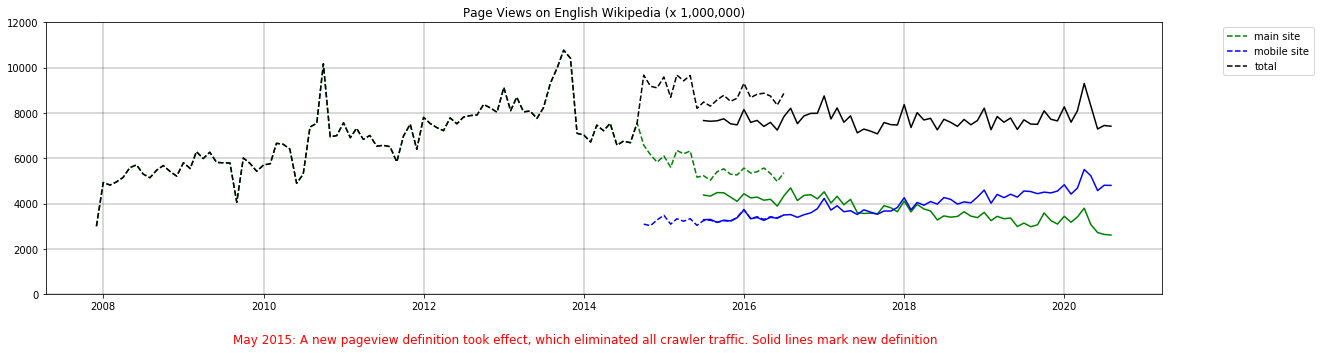

In [16]:
# Definition of date range (x-axis)
dates = pd.date_range(start='12/1/2007', end='08/1/2020', freq='MS')

# Scale to adjust for 
scale = 1000000

# List of labels in legend
labels = ['main site', 'mobile site', 'total']

# Specifying figure size
plt.figure(figsize=(20,5))   

# Plotting the data
plt.plot(dates, final_data['pagecount_desktop_views']/scale, color = 'green', linestyle='dashed')
plt.plot(dates, final_data['pagecount_mobile_views']/scale, color = 'blue', linestyle='dashed')
plt.plot(dates, final_data['pagecount_all_views']/scale, color = 'black', linestyle='dashed')
plt.plot(dates, final_data['pageview_desktop_views']/scale, color = 'green')
plt.plot(dates, final_data['pageview_mobile_views']/scale, color = 'blue')
plt.plot(dates, final_data['pageview_all_views']/scale, color = 'black')

# Plotting legend
plt.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Grid, title and limit specifications
plt.grid(color='black', linestyle='-', linewidth=0.3)    # plotting grid background
plt.title('Page Views on English Wikipedia (x 1,000,000)')   # specifying plot title
plt.ylim(0, 12000)

# Adding caption about pageview definition change
txt = 'May 2015: A new pageview definition took effect, which eliminated all crawler traffic. Solid lines mark new definition'
plt.figtext(0.5, -0.01, txt, wrap=True, horizontalalignment='center', fontsize=12, color = 'red')

# Saving figure
plt.savefig('Page Views on English Wikipedia.png')